# Power of Tests

As you have already seen, there is a significant risk of finding falsely significant results when testing hypotheses. On the other hand, there is also a significant chance that an actual effect will not be detected. We call the ability of a test to detect an actual effect as the **power**.   

>The **power of a test** is formally defined as:   

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$   

>In pain language, the power is the probability of getting a positive result when the null hypothesis is not true. Conversely, a test with insufficient power will not detect a real effect. Clearly, we want the most powerful test we can find for the situation. 

>Computing test power can be a bit complex, and analytical solutions can be difficult or impossible. Often, a simulation is used to compute power. 

In this exercise you will compute the power for a two sample t-test. The power of this test depends on the several parameters:

- The number of samples.
- The anticipated difference in the population means, which we call the **effect size**.
- The significance level chosen.

When running a power test, you can ask several questions, which will assist you in designing an experiment. Usually, you will determine how big a sample you need to detect an effect of the expected size. You can also determine how big an effect needs to be given a fixed sample size (all the samples you have or can afford) to detect an effect of the expected size. 

The Python [statsmodels package](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html) provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the characteristics of test power.

Execute the code in the cell below to import the packages you will need for this exercise.

In [2]:
import pandas as pd
import numpy as np
import numpy.random as nr
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

The code in the cell below does the following:

- Create a sequence of effect sizes.
- Compute a vector of power values with a fixed sample size and cutoff value.
- Plot the power vs. effect size. 

Execute this code and examine the result. 

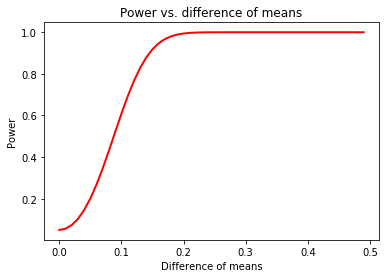

In [3]:
import statsmodels.stats.power as smsp
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 0.5, step = .01)
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 1000, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

Examine the results displayed above. Notice that for small effect sizes the chance of detecting the effect is quite small. 

The code in the cell below does the following:

- Create a sequence of cut-off values.
- Compute a vector of power values with a fixed sample size and effect size.
- Plot the power vs cut-off value. 

Execute this code and examine the result. 

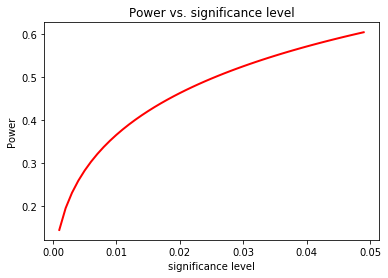

In [4]:
nr.seed(seed=1234)
alphas = np.arange(start = 0.001, stop = 0.05, step = .001)
powers = [smsp.tt_ind_solve_power(effect_size = 0.1, nobs1 = 1000, 
           alpha = x, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in alphas]

plot_power(alphas, powers, xlabel = 'significance level', title = 'Power vs. significance level')    

Examine the results displayed above. Notice that the probability of detecting the effect drops rapidly with significance level. 

In most cases of experiment design determining a sufficient sample size is of primary importance. In the cell below create the code to do the following:

- Create a sequence of sample sizes from 100 to 5,000 in steps of 100.
- Compute a vector of power values for a fixed effect size of 0.1 and a cutoff of 0.01.
- Plot the power vs. sample size. 

Execute this code and examine the result. 

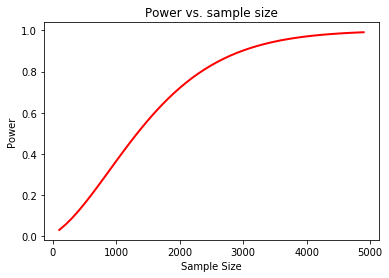

In [5]:
nr.seed(seed=1234)
effect_size = np.arange(start = 100, stop = 5000, step = 100)
powers = [smsp.tt_ind_solve_power(effect_size = 0.1, nobs1 = x, 
           alpha = 0.01, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in effect_size]

plot_power(effect_size, powers, xlabel = 'Sample Size', title = 'Power vs. sample size')    

Examine the results displayed above. How does the probability of detecting the effect drop with sample size. 

Power calculations such as these can be used to design effective experiments. 

##### Copyright 2020, Stephen F Elston. All rights reserved.